# 01. 딥러닝을 소개합니다.

# 머신러닝
### 지도학습
입력과 타깃으로 모델을 훈련시킨다.
### 비지도학습
타깃이 없는 데이터를 사용한다. ex) clustering(군집)
### 강화학습
주어진 환경으로부터 피드백을 받아 훈련한다. ex) Q-learning, SARSA, DQN(Deep Q Network)
<br><br>*** 입력, 타겟, 모델, 규칙 ***

# 02. 최소한의 도구로 딥러닝을 시작합니다.

In [1]:
# 파이썬 리스트 복습하기
my_list = [10,'hello list',20]
print(my_list[1])

hello list


In [2]:
my_list_2=[[10,20,30],[40,50,60]]
print(my_list_2[1][1])

50


In [3]:
# 넘파이 준비하기
import numpy as np
print(np.__version__)

1.19.2


In [4]:
# 넘파이로 배열 만들기
my_arr = np.array([[10,20,30],[40,50,60]])
print(my_arr)

[[10 20 30]
 [40 50 60]]


In [5]:
type(my_arr)

numpy.ndarray

In [6]:
my_arr[0][2]

30

In [7]:
np.sum(my_arr)

210

In [8]:
# 맷플롯립으로 그래프 그리기
import matplotlib.pyplot as plt

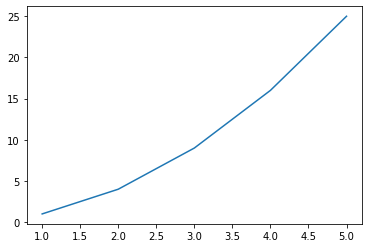

In [9]:
plt.plot([1,2,3,4,5],[1,4,9,16,25])
plt.show()

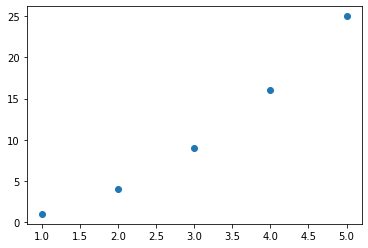

In [10]:
plt.scatter([1,2,3,4,5],[1,4,9,16,25])
plt.show()

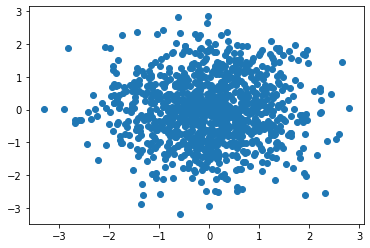

In [11]:
x = np.random.randn(1000)
y = np.random.randn(1000)
plt.scatter(x,y)
plt.show()

# 03. 머신러닝의 기초를 다집니다 - 수치예측
### 선형회귀
- y=ax+b
- 기울기와 절편을 찾아준다.

In [12]:
# 문제 해결을 위해 당뇨병 환자의 데이터 준비하기
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [13]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [14]:
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [19]:
diabetes.target[:3]

array([151.,  75., 141.])

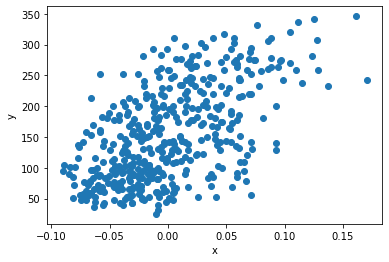

In [18]:
# 당뇨병 환자 데이터 시각화하기
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:,2],diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [19]:
x = diabetes.data[:,2]
y = diabetes.target

### 경사하강법
- 모델이 데이터를 잘 표현할 수 있도록 기울기를 사용하여 모델을 조금씩 조정하는 최적화 알고리즘

In [20]:
# 예측값으로 올바른 모델 찾기
w = 1.0
b = 1.0

In [21]:
y_hat = x[0]*w + b
print(y_hat)

1.0616962065186886


In [23]:
print(y[0])

151.0


In [24]:
w_inc = w + 0.1
y_hat_inc = x[0]*w_inc + b
print(y_hat_inc)

1.0678658271705574


In [25]:
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
print(w_rate)

0.061696206518688734


In [26]:
# 변화율로 가중치 업데이트하기
w_new = w + w_rate
print(w_new)

1.0616962065186888


In [28]:
# 변화율로 절편 업데이트하기
b_inc = b + 0.1
y_hat_inc = x[0]*w + b_inc
print(y_hat_inc)

b_rate = (y_hat_inc-y_hat)/(b_inc-b)
print(b_rate)

1.1616962065186887
1.0


In [29]:
b_new = b+b_rate
print(b_new)

2.0


In [30]:
# 오차 역전파(backpropagation)로 가중치와 절편을 더 적절하게 업데이트합니다.
err = y[0]-y_hat
w_new = w+w_rate*err
b_new = b+1*err
print(w_new, b_new)

10.250624555904514 150.9383037934813


In [31]:
y_hat = x[1]*w_new+b_new
err=y[1]-y_hat
w_rate=x[1]
w_new = w_new + w_rate*err
b_new = b_new + 1*err
print(w_new, b_new)

14.132317616381767 75.52764127612664


In [32]:
for x_i, y_i in zip(x,y):
    y_hat = x_i*w+b
    err = y_i-y_hat
    w_rate=x_i
    w=w+w_rate*err
    b=b+1*err
print(w,b)

587.8654539985689 99.40935564531424


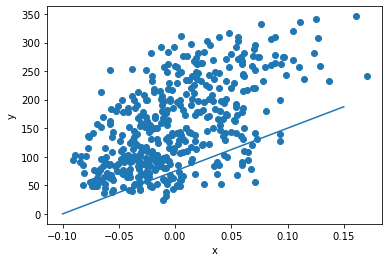

In [36]:
plt.scatter(x,y)
pt1=(-0.1,-0,1*w+b)
pt2=(0.15,0.15*w+b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [37]:
# epoch(에포크) : 전체 훈련 데이터를 모두 이용하여 한 단위의 작업을 진행하는 것
for i in range(1,100):
    for x_i, y_i in zip(x,y):
        y_hat = x_i*w+b
        err = y_i-y_hat
        w_rate=x_i
        w=w+w_rate*err
        b=b+1*err
print(w,b)

913.5973364345905 123.39414383177204


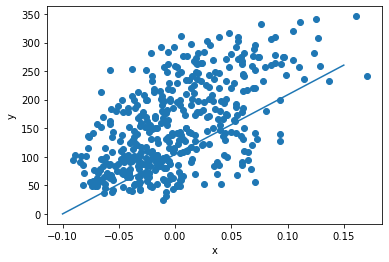

In [38]:
plt.scatter(x,y)
pt1=(-0.1,-0,1*w+b)
pt2=(0.15,0.15*w+b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [39]:
x_new=0.18
y_pred=x_new*w+b
print(y_pred)

287.8416643899983


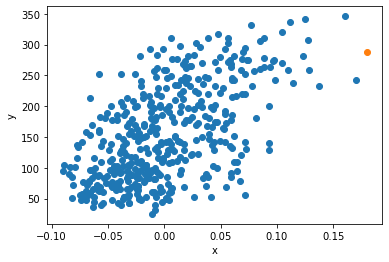

In [40]:
plt.scatter(x,y)
plt.scatter(x_new,y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 손실 함수와 경사하강법의 관계
- 가중치에 대해 제곱 오차 미분 -> -(y-y_hat)x -> w=w+(y-y_hat)x
- 절편에 대해 제곱 오차 미분 -> -(y-y_hat) -> b=b+(y-y_hat)
<br>
=> 앞에서 한것과 동일함

In [43]:
# Neuron 클래스 만들기
class Neuron:
    def __init__(self):
        self.w=1.0
        self.b=1.0
    def forpass(self,x):
        y_hat=x*self.w+self.b
        return y_hat
    def backprop(self,x,err):
        w_grad = x*err
        b_grad = 1*err
        return w_grad, b_grad
    def fit(self,x,y,epochs=100):
        for i in range(epochs):
            for x_i, y_i in zip(x,y):
                y_hat = self.forpass(x_i)
                err = -(y_i-y_hat)
                w_grad, b_grad = self.backprop(x_i, err)
                self.w -=w_grad
                self.b -=b_grad

In [44]:
neuron = Neuron()
neuron.fit(x,y)

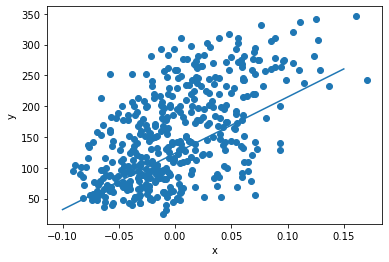

In [45]:
plt.scatter(x,y)
pt1 = (-0.1, -0.1*neuron.w+neuron.b)
pt2 = (0.15, 0.15*neuron.w+neuron.b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()